# Housekeeping

# Setup Code

In [1]:
# Import Packages
import Pkg

Pkg.add("Plots")
Pkg.add("LsqFit")
Pkg.add("DelimitedFiles")
Pkg.add("PlotlyJS")  # optional if you later want interactive plots
Pkg.add("LaTeXStrings")

┌ Warning: could not download https://pkg.julialang.org/registries
│   exception = Downloads.RequestError("https://pkg.julialang.org/registries", 6, "Could not resolve host: pkg.julialang.org", Downloads.Response(nothing, "https://pkg.julialang.org/registries", 0, "", Pair{String, String}[]))
└ @ Pkg.Registry /Users/josie/.julia/juliaup/julia-1.11.5+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/Pkg/src/Registry/Registry.jl:77
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Project.toml`
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Project.toml`
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA/Project.toml`
  No Changes to `~/Desktop/Research/Madurga/VITO-ENiGMA

In [2]:
using Plots,DelimitedFiles,LsqFit,LaTeXStrings

include("../src/PhotoPeakFit.jl");

default(framestyle=:box,
        mc=:black,
        grid=false,
        guidefont=14,
        tickfont=12,
        lc=:navy,
        xlabel="Eᵧ (internal)",
        ylabel="counts")

In [3]:
kliterature = [564.79,
               586.01,
               2013.45]

3-element Vector{Float64}:
  564.79
  586.01
 2013.45

## Import Eu152 Efficiency Calibration Data

In [4]:
# Fit function is of the form 50^(p[1]+p[2]*log10(e)+p[3]*log10(e)^2)
io = open("../calibrations/Eu152-efficiency-cal_debug.csv", "r")
clover_eff_params = readdlm(io, ',', Float64, '\n', comments=true, comment_char='#')
close(io)

c0_eff_fit, c1_eff_fit, c2_eff_fit = clover_eff_params[1,:],clover_eff_params[2,:],clover_eff_params[3,:]

c0_eff_params,c1_eff_params,c2_eff_params = [c0_eff_fit[1],c0_eff_fit[3],c0_eff_fit[5]],
                                            [c1_eff_fit[1],c1_eff_fit[3],c1_eff_fit[5]],
                                            [c2_eff_fit[1],c2_eff_fit[3],c2_eff_fit[5]]

c0_σeff,c1_σeff,c2_σeff = [c0_eff_fit[2],c0_eff_fit[4],c0_eff_fit[6]], 
                          [c1_eff_fit[2],c1_eff_fit[4],c1_eff_fit[6]],
                          [c2_eff_fit[2],c2_eff_fit[4],c2_eff_fit[6]]

([0.04994475356378319, 0.03881764706440051, 0.0074349631904078745], [0.058397370815562344, 0.04589348487849286, 0.008923473979328399], [0.046981088183109074, 0.03611056774624827, 0.006851762049610171])

# Clover 0 ($N_{180}$)

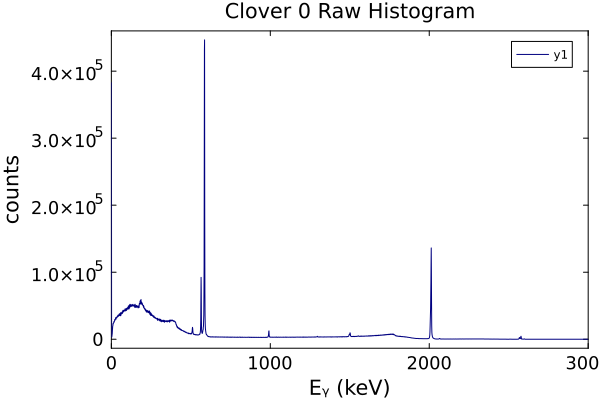

In [6]:
kc0 = readdlm("rough_data//K47_T1_002/K47_T1_002_beta0_clover.txt",',')

# Plot uncalibrated histogram
plot(kc0[:,1],kc0[:,2],xlims=(0,3000),xlabel="Eᵧ (keV)", title="Clover 0 Raw Histogram")

## Peak 1 (565)

P1 = 141084.658241178(204655.86566414646)
P2 = -228.43089905224318(363.4814229389561)
P3 = 234593.0331818749(12304.989190557977)
P4 = 564.6099768391682(0.045076070418019434)
P5 = 1.1593832006262152(0.052892223133989474)
Calibrated - Expected = -0.18002316083175174 keV


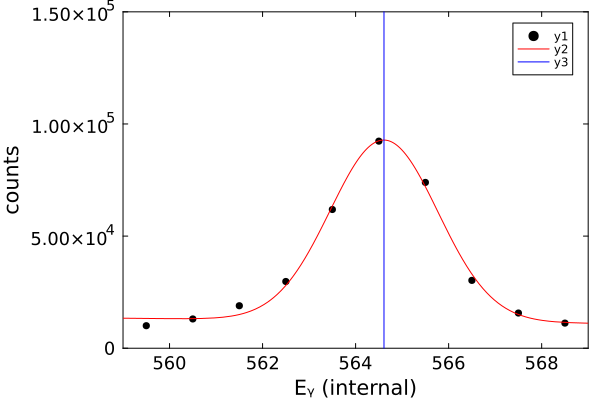

In [26]:
c0_p1_mean = 564
c0_x1low,c0_x1high=c0_p1_mean-5,c0_p1_mean+5; ylow,yhigh=0,1.5e5
c0_param1=[100,0.05,2e5,c0_p1_mean,1.0]

c0_p1,c0_s1,f=PhotopeakFit.gaussianfit(kc0,c0_x1low,c0_x1high,c0_param1)

for (i,val) in enumerate(c0_p1)
    println("P$i = ",val,"($(c0_s1[i]))")
end
println("Calibrated - Expected = $(c0_p1[4] - kliterature[1]) keV")

scatter(kc0[:,1],kc0[:,2],xlims=(c0_x1low,c0_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c0_p1),c0_x1low,c0_x1high,lc=:red)
vline!([c0_p1[4]],lc=:blue)

## Peak 2 (586)

P1 = 387574.80226024345(204655.86566414646)
P2 = -625.7528390613866(363.4814229389561)
P3 = 1.410674228594646e6(12304.989190557977)
P4 = 585.875710594057(0.045076070418019434)
P5 = 1.254615775699626(0.052892223133989474)
Calibrated - Expected = -0.1342894059430364 keV


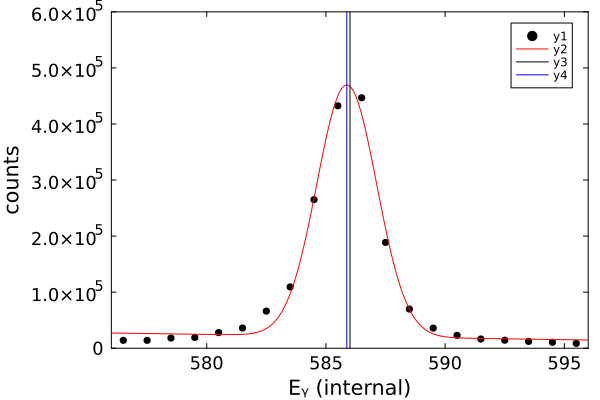

In [27]:
c0_p2_mean = 586
c0_x1low,c0_x1high=c0_p2_mean-10,c0_p2_mean+10; ylow,yhigh=0,6e5
c0_param1=[100,0.05,2e5,c0_p2_mean,1.0]

c0_p2,c0_s2,f=PhotopeakFit.gaussianfit(kc0,c0_x1low,c0_x1high,c0_param1)

for (i,val) in enumerate(c0_p2)
    println("P$i = ",val,"($(c0_s1[i]))")
end
println("Calibrated - Expected = $(c0_p2[4] - kliterature[2]) keV")

scatter(kc0[:,1],kc0[:,2],xlims=(c0_x1low,c0_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c0_p2),c0_x1low,c0_x1high,lc=:red)
vline!(kliterature,lc=:black)
vline!([c0_p2[4]],lc=:blue)

## Peak 3 (2013)

P1 = 1.9924114146808942e6(204655.86566414646)
P2 = -984.643028686028(363.4814229389561)
P3 = 556505.6377360438(12304.989190557977)
P4 = 2012.0411433415973(0.045076070418019434)
P5 = 1.9281255557809733(0.052892223133989474)
Calibrated - Expected = -1.408856658402783 keV


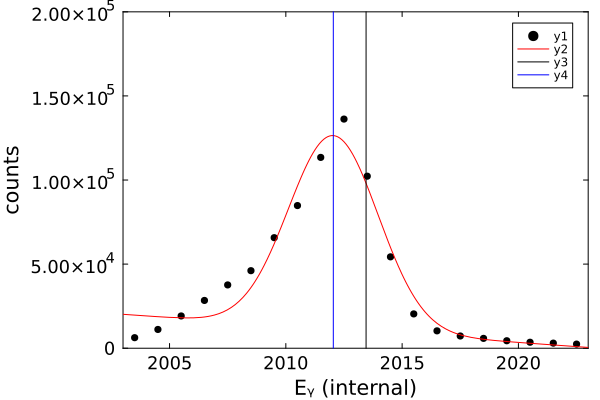

In [28]:
c0_p3_mean = 2013
c0_x1low,c0_x1high=c0_p3_mean-10,c0_p3_mean+10; ylow,yhigh=0,2e5
c0_param1=[100,0.05,2e5,c0_p3_mean,1.0]

c0_p3,c0_s3,f=PhotopeakFit.gaussianfit(kc0,c0_x1low,c0_x1high,c0_param1)

for (i,val) in enumerate(c0_p3)
    println("P$i = ",val,"($(c0_s1[i]))")
end
println("Calibrated - Expected = $(c0_p3[4] - kliterature[3]) keV")

scatter(kc0[:,1],kc0[:,2],xlims=(c0_x1low,c0_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c0_p3),c0_x1low,c0_x1high,lc=:red)
vline!(kliterature,lc=:black)
vline!([c0_p3[4]],lc=:blue)

## Areas

In [29]:
c0_areas = [c0_p1[3], 
            c0_p2[3], 
            c0_p3[3]]

c0_σareas = [c0_s1[3],
             c0_s2[3],
             c0_s3[3]] 
             

3-element Vector{Float64}:
 12304.989190557977
 49816.091740725045
 42817.80108571718

# Clover 1 ($N_{0}$)

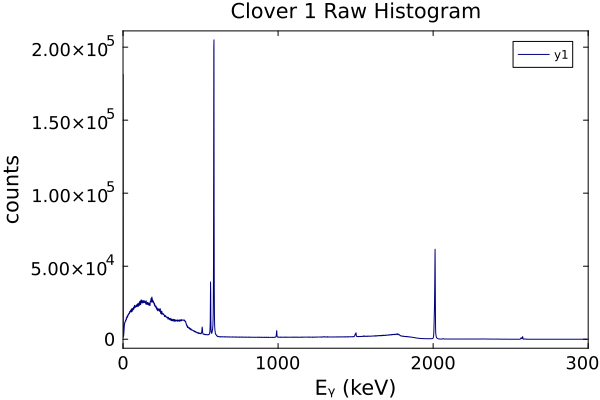

In [30]:
kc1 = readdlm("rough_data/K47_T1_002/K47_T1_002_beta1_clover.txt",',')

# Plot uncalibrated histogram
plot(kc1[:,1],kc1[:,2],xlims=(0,3000),xlabel="Eᵧ (keV)", title="Clover 1 Raw Histogram")

## Peak 1 (565)

P1 = 127239.18703108586(135885.6177852452)
P2 = -214.696332362523(241.64901659040072)
P3 = 95328.72481774578(6576.904251494523)
P4 = 564.6310109622434(0.04739430140237974)
P5 = 1.1332722988491437(0.060593501081585406)
Calibrated - Expected = -0.15898903775655526 keV


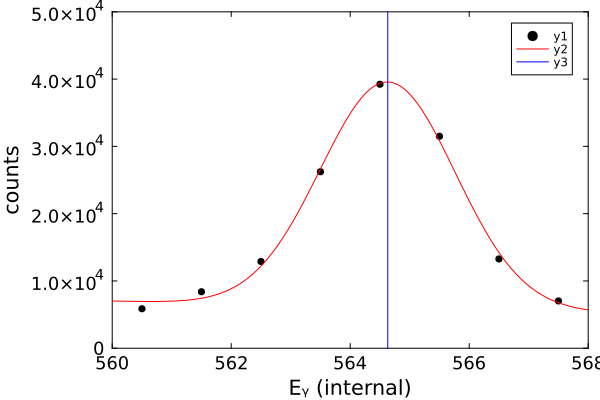

In [31]:
c1_p1_mean = 564
c1_x1low,c1_x1high=c1_p1_mean-4,c1_p1_mean+4; ylow,yhigh=0,5e4
c1_param1=[100,0.05,2e5,c1_p1_mean,1.0]

c1_p1,c1_s1,f=PhotopeakFit.gaussianfit(kc1,c1_x1low,c1_x1high,c1_param1)

for (i,val) in enumerate(c1_p1)
    println("P$i = ",val,"($(c1_s1[i]))")
end
println("Calibrated - Expected = $(c1_p1[4] - kliterature[1]) keV")

scatter(kc1[:,1],kc1[:,2],xlims=(c1_x1low,c1_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c1_p1),c1_x1low,c1_x1high,lc=:red)
vline!([c1_p1[4]],lc=:blue)

## Peak 2 (586)

P1 = 171817.4935895111(135885.6177852452)
P2 = -276.72541054768624(241.64901659040072)
P3 = 650347.9398286853(6576.904251494523)
P4 = 585.874460120573(0.04739430140237974)
P5 = 1.2585280362551219(0.060593501081585406)
Calibrated - Expected = -0.1355398794270286 keV


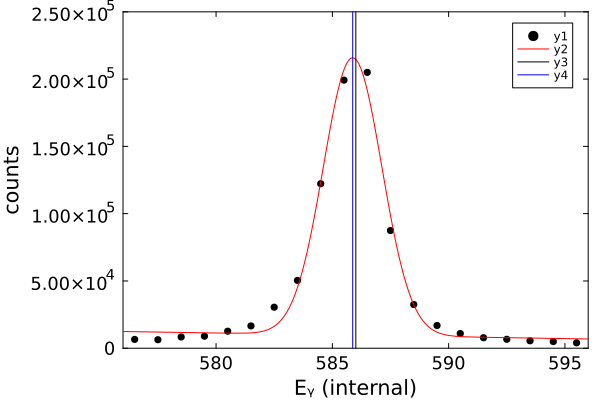

In [32]:
c1_p2_mean = 586
c1_x1low,c1_x1high=c1_p2_mean-10,c1_p2_mean+10; ylow,yhigh=0,2.5e5
c1_param1=[100,0.05,2e5,c1_p2_mean,1.0]

c1_p2,c1_s2,f=PhotopeakFit.gaussianfit(kc1,c1_x1low,c1_x1high,c1_param1)

for (i,val) in enumerate(c1_p2)
    println("P$i = ",val,"($(c1_s1[i]))")
end
println("Calibrated - Expected = $(c1_p2[4] - kliterature[2]) keV")

scatter(kc1[:,1],kc1[:,2],xlims=(c1_x1low,c1_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c1_p2),c1_x1low,c1_x1high,lc=:red)
vline!(kliterature,lc=:black)
vline!([c1_p2[4]],lc=:blue)

## Peak 3 (2013)

P1 = 281798.87019737245(135885.6177852452)
P2 = -138.70949614283006(241.64901659040072)
P3 = 283782.0341335392(6576.904251494523)
P4 = 2011.9107390542877(0.04739430140237974)
P5 = 2.1368459303613943(0.060593501081585406)
Calibrated - Expected = -1.5392609457123854 keV


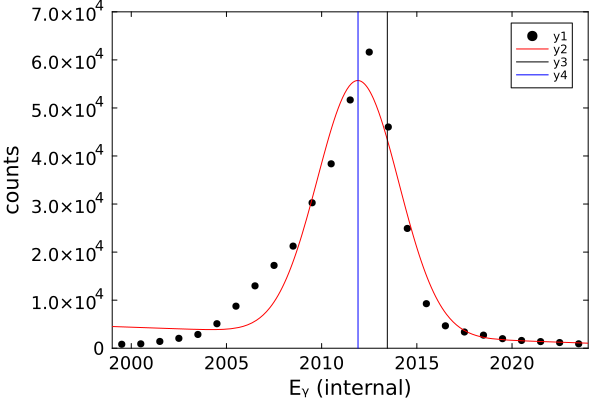

In [33]:
c1_p3_mean = 2014
c1_x1low,c1_x1high=c1_p3_mean-15,c1_p3_mean+10; ylow,yhigh=0,7e4
c1_param1=[100,0.05,2e5,c1_p3_mean,1.0]

c1_p3,c1_s3,f=PhotopeakFit.gaussianfit(kc1,c1_x1low,c1_x1high,c1_param1)

for (i,val) in enumerate(c1_p3)
    println("P$i = ",val,"($(c1_s1[i]))")
end
println("Calibrated - Expected = $(c1_p3[4] - kliterature[3]) keV")

scatter(kc1[:,1],kc1[:,2],xlims=(c1_x1low,c1_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c1_p3),c1_x1low,c1_x1high,lc=:red)
vline!(kliterature,lc=:black)
vline!([c1_p3[4]],lc=:blue)

## Areas

In [34]:
c1_areas = [c1_p1[3], 
            c1_p2[3], 
            c1_p3[3]]

c1_σareas = [c1_s1[3],
            c1_s2[3],
           c1_s3[3]] 

3-element Vector{Float64}:
  6576.904251494523
 22551.070507823115
 19622.590386186675

# Asymmetry Calcs

In [35]:
ratio = c1_areas ./ c0_areas
println(ratio)

err_rat = (((c1_σareas .^ 2) .* ((1 ./ c0_areas) .^ 2)) .+ ((c0_σareas .^ 2) .* ((-c1_areas ./ (c0_areas .^2)) .^ 2))) .^ (0.5)
println(err_rat)

[0.4063578680268799, 0.4610192251662387, 0.5099355961388119]
[0.03521774511339462, 0.022816672643573684, 0.052750860701169515]


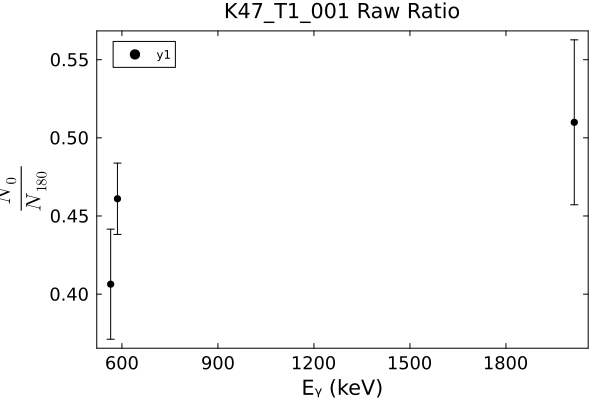

In [36]:
q = scatter(kliterature, ratio, yerr=err_rat,
    xlabel = "Eᵧ (keV)",
    ylabel = L"\frac{N_0}{N_{180}}",
    title = "K47_T1_001 Raw Ratio"
)

# Polarization Calculation

In [37]:
N_565 = ratio[1]
println(N_565)
N_σ565 = err_rat[1]
println(N_σ565)

N_586 = ratio[2]
println(N_586)
N_σ586 = err_rat[2]
println(N_σ586)

0.4063578680268799
0.03521774511339462
0.4610192251662387
0.022816672643573684


In [38]:
# quadratic gices two answers, this one gives answers too large
P_plus = ((9 .* (N_565 .+ N_586)) .+ (3 .* (((N_565 .^ 2) .+ (34 .* N_565 .* N_586) .+ (N_586 .^ 2)) .^ 0.5))) ./ (4 .* (N_565 .- N_586))
println(P_plus)

# This one gives an acceptable value
P_plus = ((9 .* (N_565 .+ N_586)) .- (3 .* (((N_565 .^ 2) .+ (34 .* N_565 .* N_586) .+ (N_586 .^ 2)) .^ 0.5))) ./ (4 .* (N_565 .- N_586))
println(P_plus)

P_percent = P_plus .* 100
println(P_percent)


err_P =  P_plus .* (((N_σ565 .^2) ./ N_565) .+ ((N_σ586 .^2) ./ N_586)) .^ 0.5


# Percent error on Polarization amount
Percent = (err_P ./ P_plus) .* 100

-71.34380422228723
-0.06307485350766012
-6.3074853507660125


6.466411927491969